Layer Size: 1
Alpha: 0.0001
RMSE for predictions: 435.4542527503761
RMSE for cross validation: 422.5240951791438


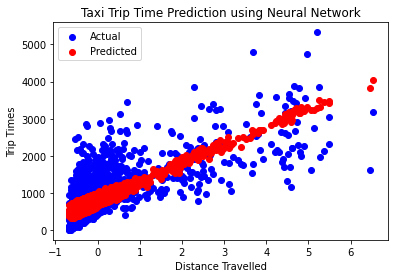

Layer Size: 2
Alpha: 0.0001
RMSE for predictions: 435.88829549498377
RMSE for cross validation: 422.5140240052095


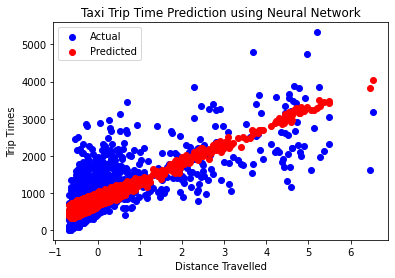

/databricks/python/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Layer Size: 4
Alpha: 0.0001
RMSE for predictions: 430.550096295158
RMSE for cross validation: 420.3640728296277


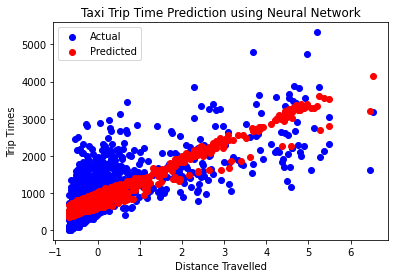

/databricks/python/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Layer Size: 8
Alpha: 0.0001
RMSE for predictions: 427.49163296678296
RMSE for cross validation: 417.4375027214899


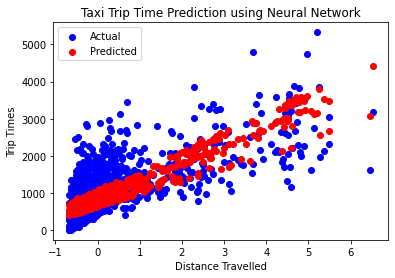

Layer Size: 16
Alpha: 0.0001
RMSE for predictions: 399.99427967975913
RMSE for cross validation: 400.32529401313906


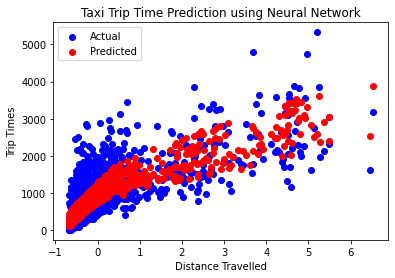

Layer Size: 32
Alpha: 0.0001
RMSE for predictions: 398.14836937938355
RMSE for cross validation: 398.35148251098866


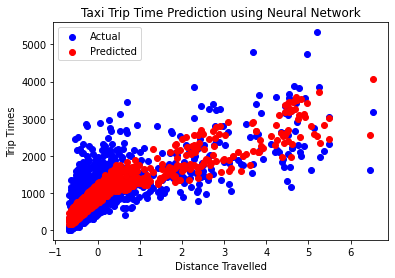

Layer Size: 64
Alpha: 0.0001
RMSE for predictions: 398.33061913447125
RMSE for cross validation: 400.4691499401989


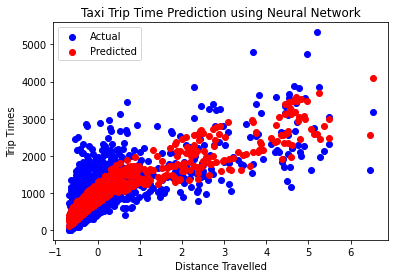

Layer Size: 128
Alpha: 0.0001
RMSE for predictions: 398.5201252626829
RMSE for cross validation: 399.7519470337191


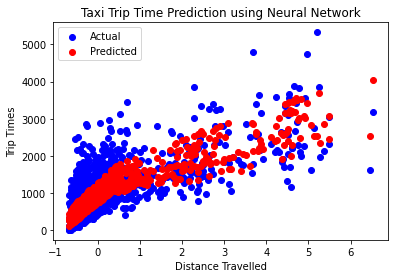

Layer Size: (4, 4)
Alpha: 0.0001
RMSE for predictions: 412.45632345110783
RMSE for cross validation: 409.8837886479246


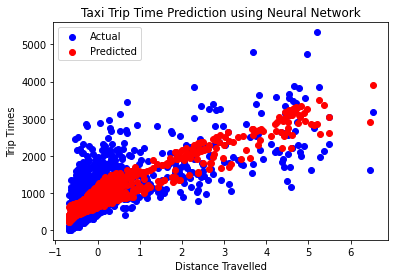

Layer Size: (8, 8)
Alpha: 0.0001
RMSE for predictions: 399.1846201456476
RMSE for cross validation: 399.19844874063295


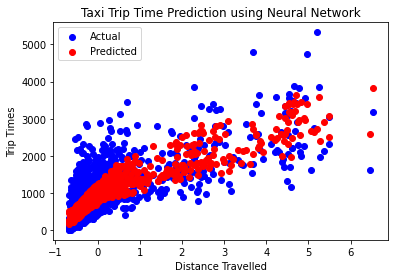

Layer Size: (16, 16)
Alpha: 0.0001
RMSE for predictions: 400.48154407010367
RMSE for cross validation: 404.4908725659004


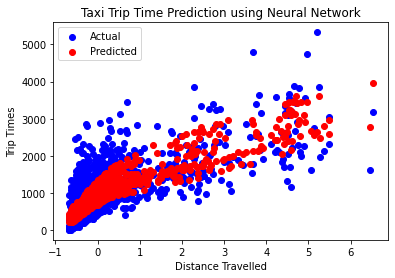

Layer Size: (32, 32)
Alpha: 0.0001
RMSE for predictions: 398.85422291567414
RMSE for cross validation: 401.8771077749997


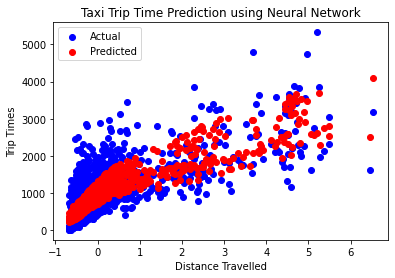

Layer Size: (64, 64)
Alpha: 0.0001
RMSE for predictions: 398.64967785098094
RMSE for cross validation: 403.1070482461325


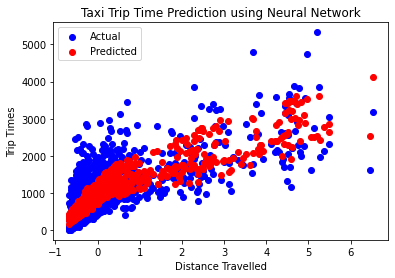

Layer Size: (4, 4, 4, 4)
Alpha: 0.0001
RMSE for predictions: 430.20112546617526
RMSE for cross validation: 419.8134577973151


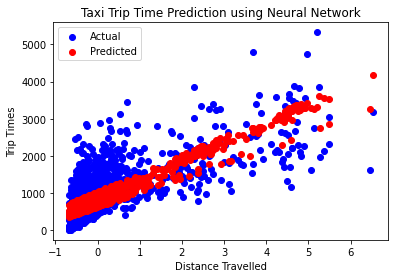

Layer Size: (8, 8, 8, 8)
Alpha: 0.0001
RMSE for predictions: 399.21576845707125
RMSE for cross validation: 396.5404879185864


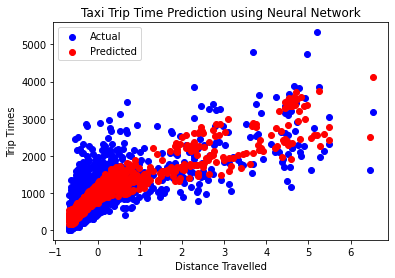

Layer Size: (16, 16, 16, 16)
Alpha: 0.0001
RMSE for predictions: 399.22166926050204
RMSE for cross validation: 401.18191446372055


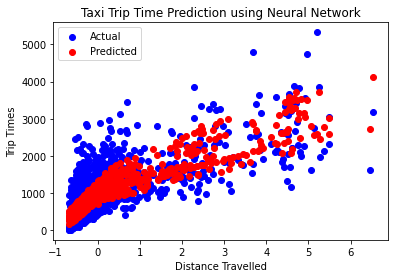

Layer Size: (32, 32, 32, 32)
Alpha: 0.0001
RMSE for predictions: 399.4522117938177
RMSE for cross validation: 402.9247608874656


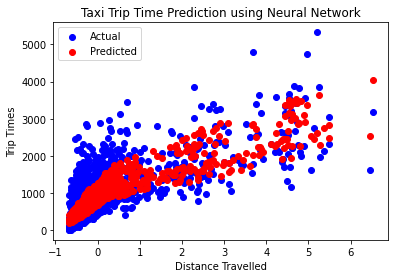

Layer Size: (64, 64, 64, 64)
Alpha: 0.0001
RMSE for predictions: 401.2664625536516
RMSE for cross validation: 405.2637569968994


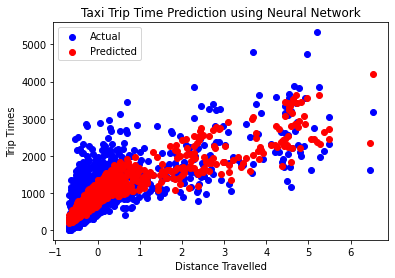

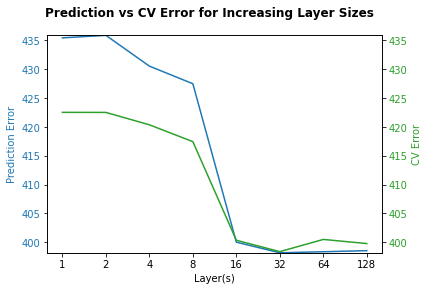

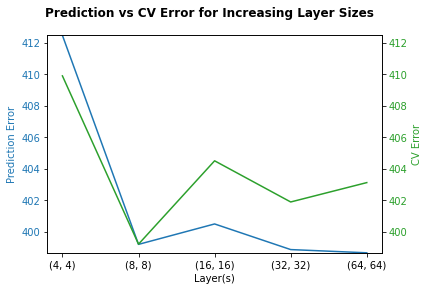

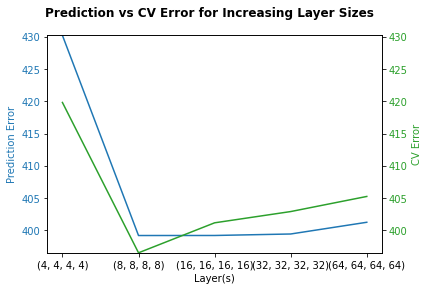

Layer Size: (8, 8, 8, 8)
Alpha: 1
RMSE for predictions: 398.26696817239815
RMSE for cross validation: 398.0671359278693
Layer Size: (8, 8, 8, 8)
Alpha: 0.5
RMSE for predictions: 399.5360774554748
RMSE for cross validation: 396.42007291170853
Layer Size: (8, 8, 8, 8)
Alpha: 0.01
RMSE for predictions: 399.3634651622542
RMSE for cross validation: 396.5609601533643
Layer Size: (8, 8, 8, 8)
Alpha: 1e-06
RMSE for predictions: 399.2383493502504
RMSE for cross validation: 397.712113325999


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import random
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import datetime
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math

# Values and Calculation for distance between two Coordinates from:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html
def getDistance(x1, y1, x2, y2):
    pickup = [float(x1), float(y1)]
    dropoff = [float(x2), float(y2)]
    pickupInRadians = [radians(_) for _ in pickup]
    dropOffInRadians = [radians(_) for _ in dropoff]
    result = haversine_distances([pickupInRadians, dropOffInRadians])
    return result[0][1] * 6371000/1000

def dateTimeToSingleValue(dateTime, valueType):
    date = datetime.datetime.strptime(dateTime, "%Y-%m-%d %H:%M:%S")
    if valueType == 0:
        return date.year
    elif valueType == 1:
        return date.month
    elif valueType == 2:
        return date.day
    elif valueType == 3:
        return date.hour
    elif valueType == 4:
        return date.minute
    else:
        return 'undefined'

def timeToPeriod(inputTime):
    val = int(inputTime)
    if val >= 0 and val < 6:
        return 'overnight'
    elif val >= 6 and val < 12:
        return 'morning'
    elif val >= 12 and val < 18:
        return 'afternoon'
    elif val >= 18 and val <= 24:
        return 'evening'
    else:
        return 'undefined'

def weekdayOrWeekend(datetimeToCheck):
    dayNum = datetime.datetime.strptime(datetimeToCheck, "%Y-%m-%d %H:%M:%S").weekday()
    if dayNum < 5:
        return 'weekday'
    elif dayNum == 5 or dayNum == 6:
        return 'weekend'
    else:
        return 'undefined'

def monthToSeason(monthToCheck):
    val = int(monthToCheck)

    if val == 12 or val == 1 or val == 2:
        return 'winter'
    elif val > 2 and val <= 5:
        return 'spring'
    elif val > 5 and val <= 8:
        return 'summer'
    elif val > 8 and val <= 11:
        return 'fall'
    else:
        return 'undefined'

data_df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/luke.couture@ucalgary.ca/train.csv").toPandas()
data = data_df.sample(10000, replace=False)

data['distance_travelled'] = data.apply(lambda x: getDistance(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)
data['pickup_year'] = data.apply(lambda x: dateTimeToSingleValue(x['pickup_datetime'], valueType=0), axis=1)
data['pickup_month'] = data.apply(lambda x: dateTimeToSingleValue(x['pickup_datetime'], valueType=1), axis=1)
data['pickup_day'] = data.apply(lambda x: dateTimeToSingleValue(x['pickup_datetime'], valueType=2), axis=1)
data['pickup_hour'] = data.apply(lambda x: dateTimeToSingleValue(x['pickup_datetime'], valueType=3), axis=1)
data['pickup_period'] = data['pickup_hour'].map(timeToPeriod)
data['pickup_day_type'] = data['pickup_datetime'].map(weekdayOrWeekend)
data['pickup_season'] = data['pickup_month'].map(monthToSeason)

# Remove outliers based on:
#   trip durations greater than 16,000 seconds
#   more than 6 passengers
#   distance traveled greater than 100km
data.drop(data[(data.trip_duration.astype(int) > 16000)].index, inplace=True)
data.drop(data[(data.passenger_count.astype(int) > 6)].index, inplace=True)
data.drop(data[(data.distance_travelled.astype(int) > 100)].index, inplace=True)

category_column_names = [
                'vendor_id',
                'pickup_period',
                'pickup_day_type',
                'pickup_season'
                ]

number_column_names = [
                'passenger_count',
                'distance_travelled'
                ]

# copy category columns, create dummy vars, copy number columns, join both
df = data[category_column_names].copy()
category_columns_df = pd.get_dummies(df, columns=category_column_names, drop_first=True)
number_columns_df = data.loc[:,number_column_names].fillna(0)
joined_df = category_columns_df.join(number_columns_df)

X = joined_df
y = data['trip_duration'].astype('int')

# Use 80% of data for training, 20% for Predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reserve 20% of training data for Cross-Validation
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=17)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_cv = scaler.transform(X_cv)

layer_sizes = [[],[],[]]
layer_sizes[0] = [(1), (2), (4), (8), (16), (32), (64), (128)]
layer_sizes[1] = [(4,4), (8,8), (16,16), (32,32), (64,64)]
layer_sizes[2] = [(4,4,4,4), (8,8,8,8), (16,16,16,16), (32,32,32,32), (64,64,64,64)]
alphas = [1, 0.5, 0.01, 1e-06]

# array to store prediction and cross validation errors for the above layer sizes
error_pred_vals = [[],[],[]]
error_cv_vals = [[],[],[]]

# contains (lowest error value, layers)
lowestPredError = (1000, None)
lowestCrossValError = (1000, None)

bestLayerSize = None
layer = 0

# Run regression using a Neural Net for all predefined layer sizes, saving the layer_size with the
# lowest cross-validation error
for layers in layer_sizes:
    for inner_layer in layers:
        # NN regression
        regr = MLPRegressor(max_iter=2500, hidden_layer_sizes=inner_layer, random_state=1)

        # Train the model on the training data
        regr.fit(X_train, y_train)
            
        # Make predictions on the test data
        y_pred = regr.predict(X_test)
        y_cross_validate = regr.predict(X_cv)

        print(f'Layer Size: {inner_layer}')
        print('Alpha: 0.0001')

        # MSE
        rmse_pred = math.sqrt(mean_squared_error(y_test, y_pred))
        rmse_cv = math.sqrt(mean_squared_error(y_cv, y_cross_validate))
        error_pred_vals[layer].append(rmse_pred)
        error_cv_vals[layer].append(rmse_cv)
        print(f'RMSE for predictions: {rmse_pred}')
        print(f'RMSE for cross validation: {rmse_cv}')

        if rmse_pred < lowestPredError[0]:
            lowestPredError = (rmse_pred, inner_layer)

        if rmse_cv < lowestCrossValError[0]:
            bestLayerSize = inner_layer
            lowestCrossValError = (rmse_cv, inner_layer)

        # Visualize the test predictions for the distance_travlled
        plt.scatter(X_test[:, -1], y_test, color='blue', label='Actual')
        plt.scatter(X_test[:, -1], y_pred, color='red', label='Predicted')
        plt.xlabel('Distance Travelled')
        plt.ylabel('Trip Times')
        plt.title('Taxi Trip Time Prediction using Neural Network')
        plt.legend()
        plt.show()

    layer += 1

# Plot the Prediction Error vs CV Error for different layer sizes
for idx, layer in enumerate(layer_sizes):
    fig, ax1 = plt.subplots()
    layer_labels = list(map(lambda x: "{}".format(x), layer))
    
    color = 'tab:blue'
    ax1.set_xlabel('Layer(s)') 
    ax1.set_ylabel('Prediction Error', color = color) 
    ax1.plot(layer_labels, error_pred_vals[idx], color = color) 
    ax1.tick_params(axis ='y', labelcolor = color) 
    
    ax2 = ax1.twinx() 
    
    color = 'tab:green'
    ax2.set_ylabel('CV Error', color = color) 
    min_x = min(min(error_pred_vals[idx]), min(error_cv_vals[idx]))
    max_x = max(max(error_pred_vals[idx]), max(error_cv_vals[idx]))
    
    ax1.set_ylim(min_x, max_x)
    ax2.set_ylim(min_x, max_x)
    
    ax2.plot(layer_labels, error_cv_vals[idx], color = color) 
    ax2.tick_params(axis ='y', labelcolor = color) 
    
    fig.suptitle('Prediction vs CV Error for Increasing Layer Sizes', fontweight ="bold") 
    plt.show() 

# Using the layer size with the lowest cross-validation error,
# Try to find an alpha value with lower error
for a in alphas:
    # NN regression
    regr = MLPRegressor(alpha=a, max_iter=2500, hidden_layer_sizes=bestLayerSize, random_state=1)

    # Train the model on the training data
    regr.fit(X_train, y_train)
            
    # Make predictions on the test data
    y_pred = regr.predict(X_test)
    y_cross_validate = regr.predict(X_cv)

    print(f'Layer Size: {bestLayerSize}')
    print(f'Alpha: {a}')
    # MSE
    rmse_pred = math.sqrt(mean_squared_error(y_test, y_pred))
    rmse_cv = math.sqrt(mean_squared_error(y_cv, y_cross_validate))
    print(f'RMSE for predictions: {rmse_pred}')
    print(f'RMSE for cross validation: {rmse_cv}')
